# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/forecast?"

# Define query parameters using documentation at https://openweathermap.org/forecast5
# exclude = current,minutely,hourly,alerts # Only retrieve daily weather data, for One Call 3.0 API 
app_id = weather_api_key
units = "metric" # Celsius and m/s
cnt = 1 # Retrieve data for only one timestamp (default is 40 three-hour intervals)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Define query parameters for lat and lon, which are stored in zip object lat_lngs
    lat = lat_lngs[i][0]
    lon = lat_lngs[i][1]

    # Create endpoint URL with each city
    city_url = f"{url}lat={lat}&lon={lon}&appid={app_id}&units={units}&cnt={cnt}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["city"]["coord"]["lat"]
        city_lng = city_weather["city"]["coord"]["lon"]
        city_max_temp = city_weather["list"][0]["main"]["temp_max"]
        city_humidity = city_weather["list"][0]["main"]["humidity"]
        city_clouds = city_weather["list"][0]["clouds"]["all"]
        city_wind = city_weather["list"][0]["wind"]["speed"]
        city_country = city_weather["city"]["country"]
        city_date = city_weather["list"][0]["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | vadso
Processing Record 4 of Set 1 | fale old settlement
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | kerikeri
Processing Record 10 of Set 1 | puerto baquerizo moreno
Processing Record 11 of Set 1 | mirny
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | suva
Processing Record 14 of Set 1 | stephenville
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | taiohae
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | vilyuchinsk
Processing Record 22 of Set 1 | cargados carajos
Processin

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [18]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,87.6905,-51.5371,-6.18,94,100,7.51,,1730386800
1,port-aux-francais,-82.3078,96.4820,-41.49,92,93,4.74,,1730386800
2,vadso,79.8120,30.1178,-2.77,59,49,6.10,,1730386800
3,fale old settlement,2.5361,-160.5040,26.47,82,4,4.16,,1730386800
4,waitangi,-59.2258,-179.3472,3.44,85,74,9.23,,1730386800
...,...,...,...,...,...,...,...,...,...
598,cable beach,-24.5923,109.7537,21.72,78,2,6.90,,1730386800
599,namibe,-3.3733,126.5867,19.96,93,91,0.57,ID,1730386800
600,kalisz,-36.0625,-125.7723,13.32,63,91,6.06,,1730386800
601,mtambile,85.5739,-67.4700,-8.51,94,100,7.28,,1730386800


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,87.6905,-51.5371,-6.18,94,100,7.51,NaN,1730386800
1,port-aux-francais,-82.3078,96.4820,-41.49,92,93,4.74,NaN,1730386800
2,vadso,79.8120,30.1178,-2.77,59,49,6.10,NaN,1730386800
3,fale old settlement,2.5361,-160.5040,26.47,82,4,4.16,NaN,1730386800
4,waitangi,-59.2258,-179.3472,3.44,85,74,9.23,NaN,1730386800


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [34]:
# Convert UNIX time to datetime
from datetime import datetime

print(datetime.fromtimestamp(city_data_df["Date"][0]))

2024-10-31 08:00:00


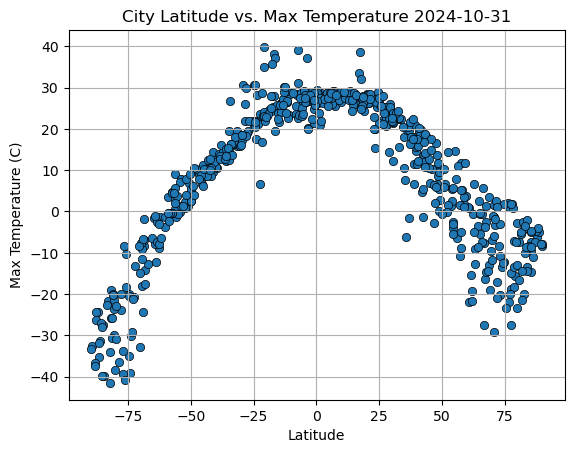

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors = "black", linewidths = 0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature 2024-10-31")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

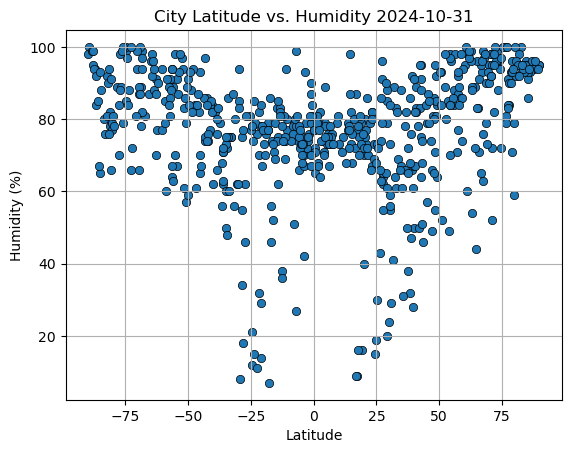

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = "black", linewidths = 0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 2024-10-31")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

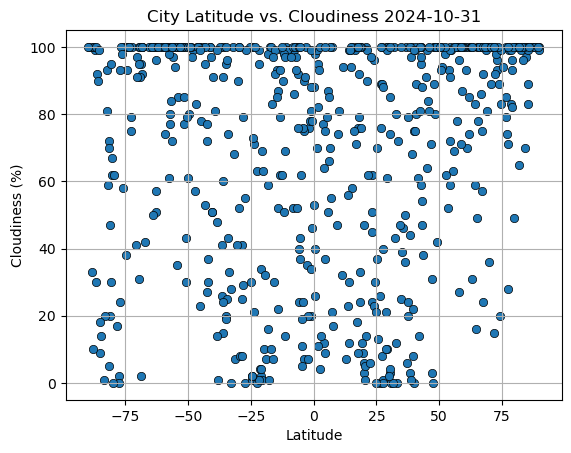

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = "black", linewidths = 0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness 2024-10-31")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

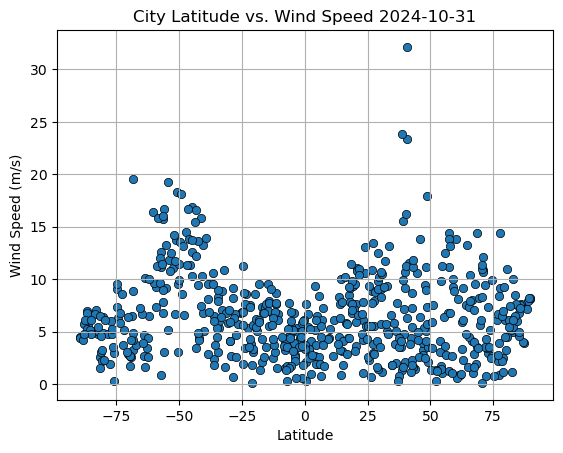

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors = "black", linewidths = 0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed 2024-10-31")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Build regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Build the scatter plot
    plt.scatter(x_values, y_values)

    # Add regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (min(x_values), min(regress_values)), fontsize=15, color="red")

    # Add r-squared value
    print(f"The r-squared is: {rvalue**2:.2f}")

    # Incorporate the other graph properties
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    # Save the figure
    plt.savefig(f"output_data/Fig-{title}.png")
    
    # Show plot
    plt.show()

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,87.6905,-51.5371,-6.18,94,100,7.51,NaN,1730386800
2,vadso,79.8120,30.1178,-2.77,59,49,6.10,NaN,1730386800
3,fale old settlement,2.5361,-160.5040,26.47,82,4,4.16,NaN,1730386800
11,iqaluit,61.4582,113.9003,-15.29,98,100,0.85,RU,1730386800
12,suva,85.5337,-81.7082,-9.55,94,100,7.25,NaN,1730386800


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-82.3078,96.4820,-41.49,92,93,4.74,NaN,1730386800
4,waitangi,-59.2258,-179.3472,3.44,85,74,9.23,NaN,1730386800
5,adamstown,-40.6638,-125.9017,11.67,84,51,13.22,NaN,1730386800
6,albany,-54.4055,110.5766,-0.11,67,35,5.21,NaN,1730386800
7,atafu village,-24.4942,-129.8619,21.96,78,100,11.26,PN,1730386800


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.81


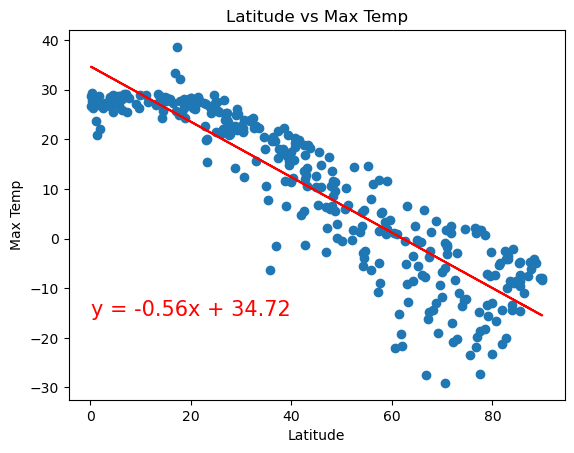

In [55]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp",
    "Latitude vs Max Temp")

The r-squared is: 0.88


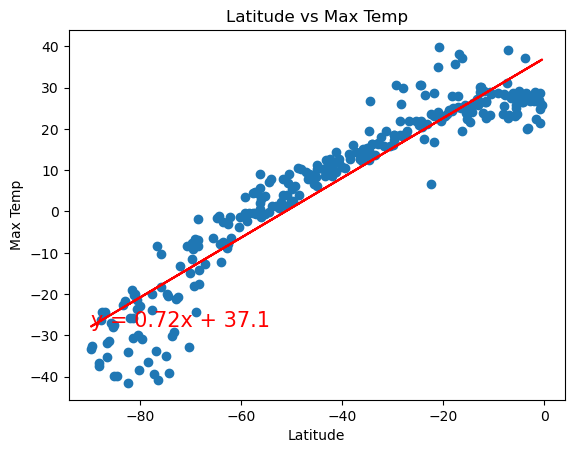

In [56]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temp",
    "Latitude vs Max Temp")

**Discussion about the linear relationship:** Maximum daily temperature is highly correlated with latitude. This is expected, as daily temperatures are dependent on exposure to solar radiation per area and the duration of that expsoure.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.21


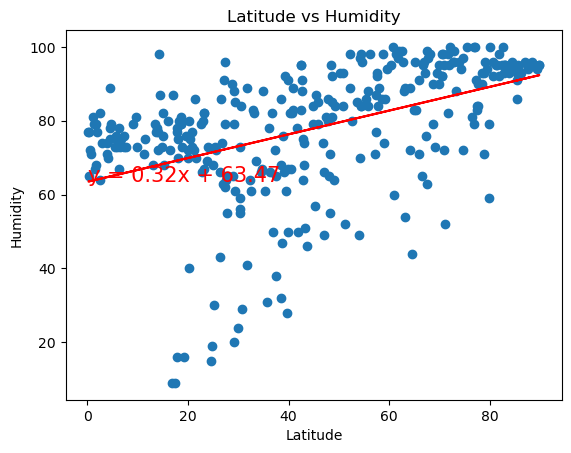

In [57]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity",
    "Latitude vs Humidity")

The r-squared is: 0.16


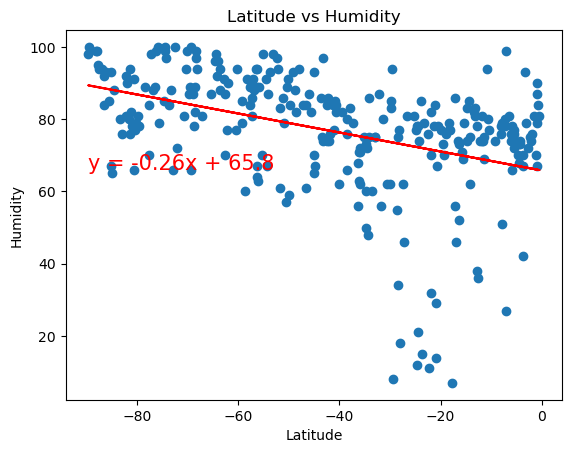

In [58]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity",
    "Latitude vs Humidity")

**Discussion about the linear relationship:** While correlation is weak, it seems visually that it would increase if outliers were removed. However, the trend is toward higher humidity toward the poles. Absolute humidity tends to be higher near the equator, so perhaps the original data uses relative humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.17


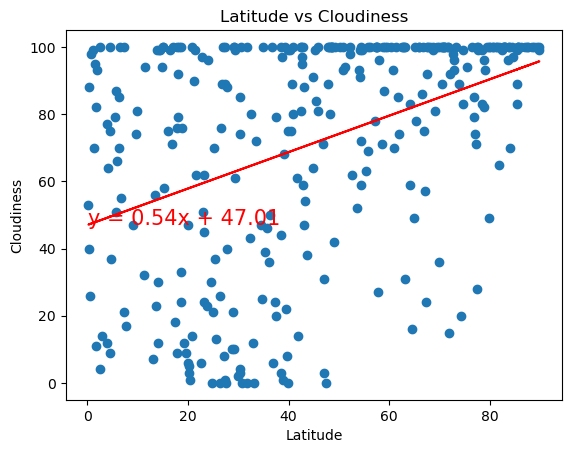

In [59]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness",
    "Latitude vs Cloudiness")

The r-squared is: 0.02


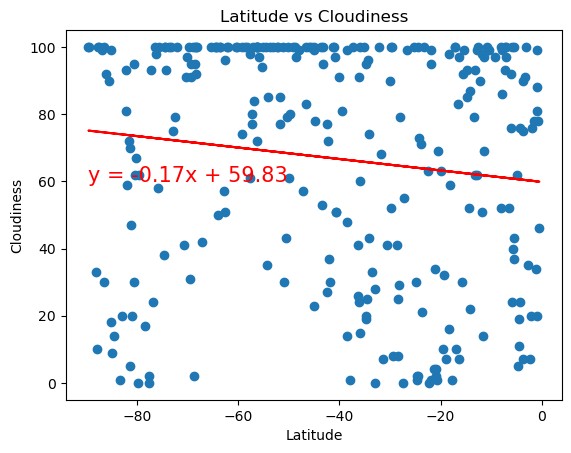

In [60]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness",
    "Latitude vs Cloudiness")

**Discussion about the linear relationship:** Cloudiness is not correlated with latitude. However, there are many data points of 100% cloud cover. Since the original data measured cloudiness at a specific day and time, this is expected. An averaged cloudiness would be expected to have much fewer 100% datapoints.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00


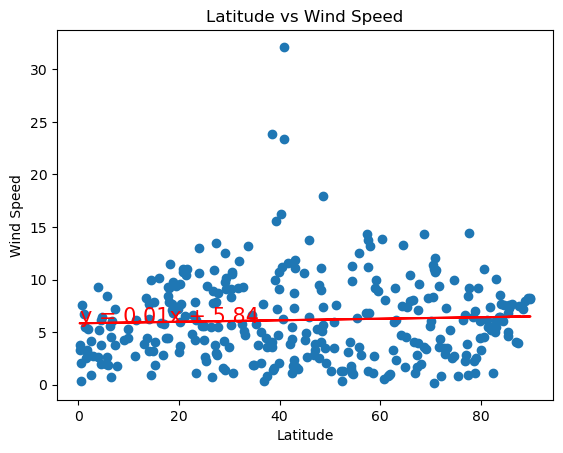

In [61]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed",
    "Latitude vs Wind Speed")

The r-squared is: 0.02


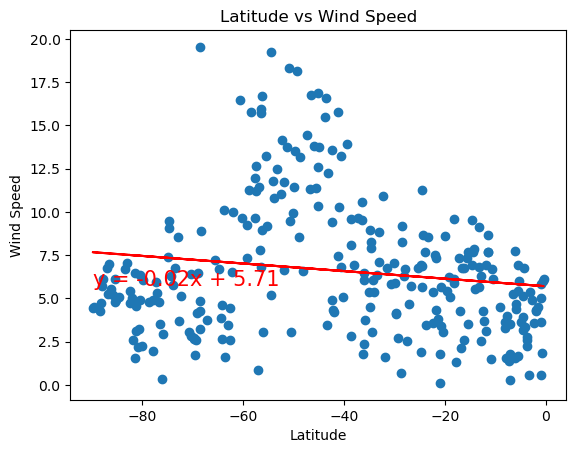

In [62]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed",
    "Latitude vs Wind Speed")

**Discussion about the linear relationship:** Wind speed is not correlated with latitude. This is expected since many other factors affect wind speed, including geographic features like oceans and mountain ranges.